### DATA 245: Assignment No 3

### Ques 6: Could you implement your own KNN function from scratch (without calling any existing classifier packages)? Your own KNN function must have following parameters to tune:n_neighbors, weights. Can you compare your own classifier with sklearnneighbors.KNeighborsClassifier in terms performance, complexity, etc. Data usage:datasets.load_iris() from sklearn.

### EDA

In [63]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns

In [64]:
iris = load_iris()
iris_df = pd.DataFrame(data= iris['data'], columns= iris['feature_names'])
iris_df['target'] = iris.target
iris_df['species'] = iris.target_names[iris.target]
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [65]:
iris.data.shape

(150, 4)

In [66]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [67]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [68]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


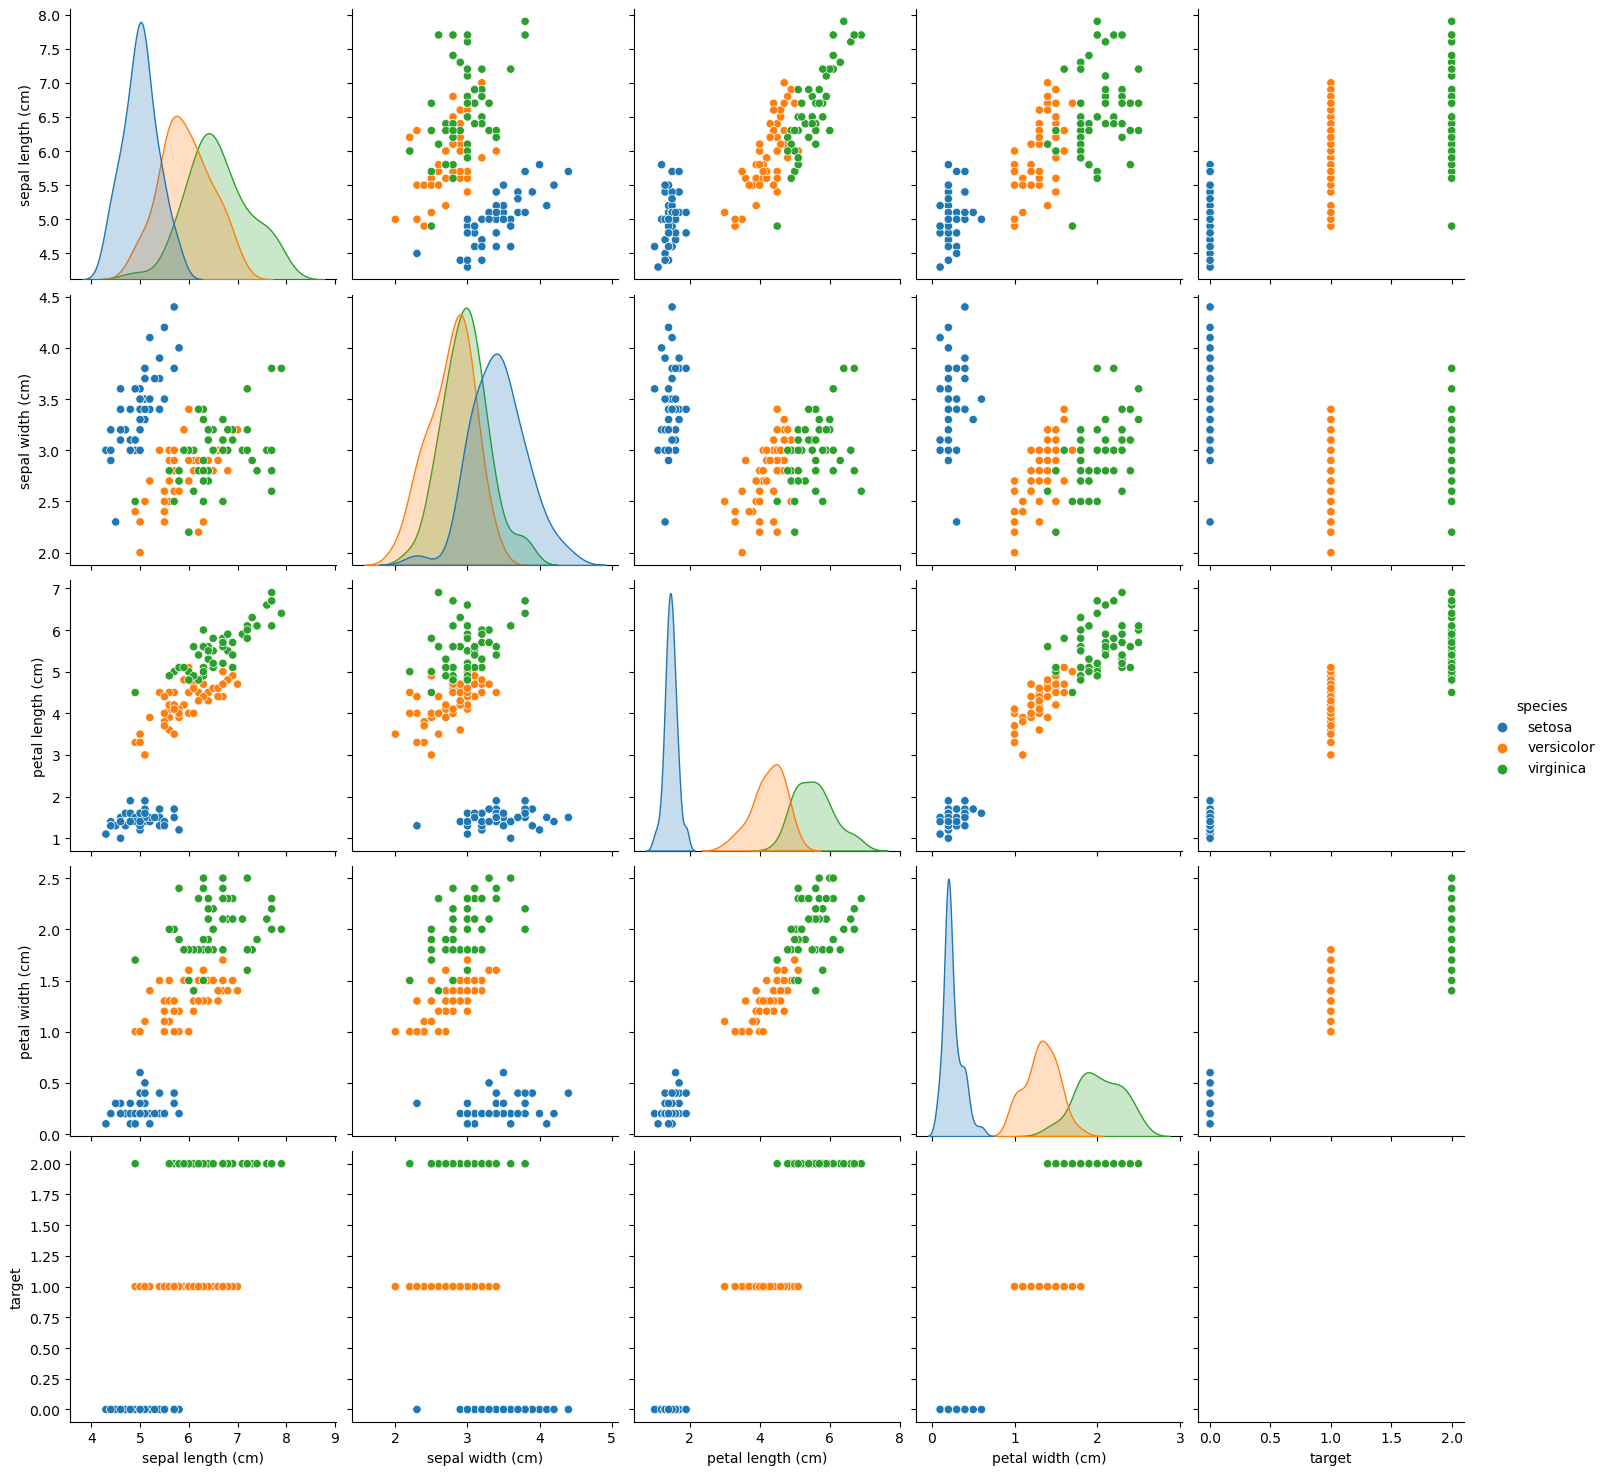

In [69]:
# Pairplot for pairwise relationships between features
sns.pairplot(iris_df, hue="species", kind = 'scatter',size = 3)

### Creating Custom K-NN Function 

In [70]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from collections import Counter
import time

In [71]:
X = iris['data']
y = iris['target']

In [72]:
# split the data into test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [73]:
class CustomKNN:
    
    def __init__(self, n_neighbors=5, weights='uniform'):
        self.n_neighbors = n_neighbors
        self.weights = weights
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def euclidean_distance(self, point, data):
        return np.sqrt(np.sum((point - data) ** 2))
    
    # Getting nearest neighbors and weights and making predictions
    def predict(self, X_test):
        predictions = []
        
        for x_test_point in X_test:
            
            # nearest neighbors
            distances = [self.euclidean_distance(x_test_point, train_point) for train_point in self.X_train]
            nearest_neighbors = np.argsort(distances)[:self.n_neighbors]
            
            if self.weights == 'uniform':
                
                neighbor = self.y_train[nearest_neighbors]
                prediction_label = Counter(neighbor).most_common(1)[0][0]
                
                
            elif self.weights == 'distance':
                
                neighbor = self.y_train[nearest_neighbors]
                weights = 1 / (np.array(distances)[nearest_neighbors] + 1e-10) 
                
                weighted_votes = Counter({label: np.sum(weights[neighbor == label]) for label in np.unique(neighbor)})
                
                prediction_label = weighted_votes.most_common(1)[0][0]
            else:
                # Default to 'uniform' weights if the specified weight type is not recognized
                print("Invalid weight type. Defaulting to 'uniform' weights.")
                
                self.weights = 'uniform'
                
                neighbor = self.y_train[nearest_neighbors]
                prediction_label = Counter(neighbor).most_common(1)[0][0]
                
            predictions.append(prediction_label)
            
        return np.array(predictions)

custom_knn = CustomKNN(n_neighbors=5, weights='uniform')
start_time_custom = time.time()

custom_knn.fit(X_train, y_train)

# Make predictions

y_pred_custom_knn = custom_knn.predict(X_test)

# Calculate accuracy and measurement of time taken

accuracy_custom_knn = accuracy_score(y_test, y_pred_custom_knn)
end_time_custom = time.time()

print("Custom KNN Accuracy: {:.10f}".format(accuracy_custom_knn))

print(f"Custom KNN Time taken: {end_time_custom - start_time_custom}")


Custom KNN Accuracy: 0.9666666667
Custom KNN Time taken: 0.030055999755859375


### Sk-Learn KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [75]:
# SK Leran KNN

sklearn_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
start_time_sklearn = time.time()
sklearn_knn.fit(X_train, y_train)

# Make predictions

y_pred_sklearn = sklearn_knn.predict(X_test)

# Calculate accuracy and measurement of time taken

accuracy_sklearn_knn = accuracy_score(y_test, y_pred_sklearn)

print(f"Sklearn KNN Accuracy: {accuracy_sklearn_knn}")

end_time_sklearn = time.time()

print(f"Sklearn KNN Time taken: {end_time_sklearn - start_time_sklearn}")


Sklearn KNN Accuracy: 0.9666666666666667
Sklearn KNN Time taken: 0.0077419281005859375


In [2]:
#Changing the random state to 42 in train and test split, accuracy comes out to be 1.0 with the same parameters for both custom and sklearn KNN

In [76]:
confusion_matrix(y_test,y_pred_sklearn)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

In [77]:
print(classification_report(y_test,y_pred_sklearn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [78]:
# Comparing Accuracy
print(f"Custom KNN Accuracy: {accuracy_custom_knn}")

print(f"Sklearn KNN Accuracy: {accuracy_sklearn_knn}")

# Comparing Time Taken
print(f"\nCustom KNN Time taken: {end_time_custom - start_time_custom}")

print(f"Sklearn KNN Time taken: {end_time_sklearn - start_time_sklearn}")

Custom KNN Accuracy: 0.9666666666666667
Sklearn KNN Accuracy: 0.9666666666666667

Custom KNN Time taken: 0.030055999755859375
Sklearn KNN Time taken: 0.0077419281005859375


When Comparing Complexity, we see that the time taken for custom KNN is more than that of Sklearn KNN. SKlearn KNN is more optimized and faster than Custom KNN. Sklearn KNN demonstrates better time complexity. 
When Comparing Accuracy, we see that the accuracy of both the models is same.

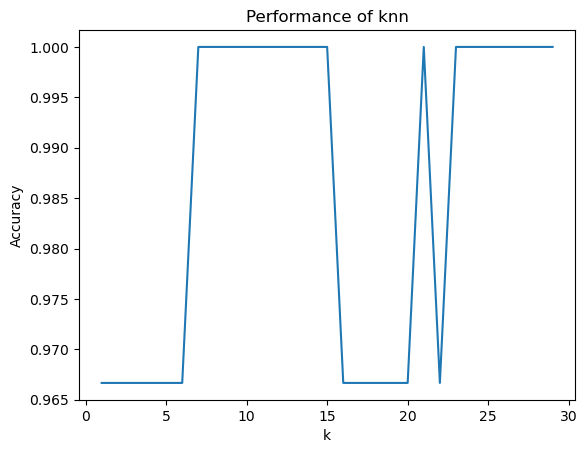

In [79]:
# Plotting the accuracy of the custom KNN implementation for different values of k
accuracies = []
ks = range(1, 30)

for k in ks:
    knn = CustomKNN(n_neighbors= k, weights='uniform')
    
    knn.fit(X_train, y_train)
    
    y_pred_custom_knn = knn.predict(X_test)
    
    accuracy_custom_knn = accuracy_score(y_test, y_pred_custom_knn)
    
    accuracies.append(accuracy_custom_knn)
   
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

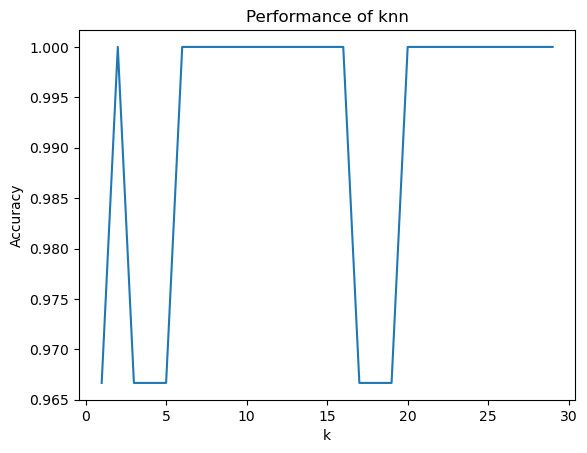

In [80]:
# plotting the accuracy of the sklearn KNN implementation for different values of k
accuracies = []
ks = range(1, 30)

for k in ks:
    
    sk_learn_knn = KNeighborsClassifier(n_neighbors= k, weights='uniform')
    sk_learn_knn.fit(X_train, y_train)
    
    y_pred_sklearn_knn = sk_learn_knn.predict(X_test)
    
    accuracy_sklearn_knn = accuracy_score(y_test, y_pred_sklearn_knn)
    
    accuracies.append(accuracy_sklearn_knn)

fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [81]:
import matplotlib.pyplot as plt

# Define range of neighbors
neighbors_range = range(1, 21)

# Lists to store accuracies
train_accuracies_custom_knn = []
test_accuracies_custom_knn = []

# Loop through different number of neighbors
for n_neighbors in neighbors_range:
    
    # Custom KNN
    custom_knn = CustomKNN(n_neighbors=n_neighbors, weights='uniform')
    
    custom_knn.fit(X_train, y_train)
    
    # Train accuracy
    y_pred_train_custom_knn = custom_knn.predict(X_train)
    
    train_accuracy_custom_knn = accuracy_score(y_train, y_pred_train_custom_knn)
    
    train_accuracies_custom_knn.append(train_accuracy_custom_knn)
    
    # Test accuracy
    y_pred_test_custom_knn = custom_knn.predict(X_test)
    
    test_accuracy_custom_knn = accuracy_score(y_test, y_pred_test_custom_knn)
    
    test_accuracies_custom_knn.append(test_accuracy_custom_knn)


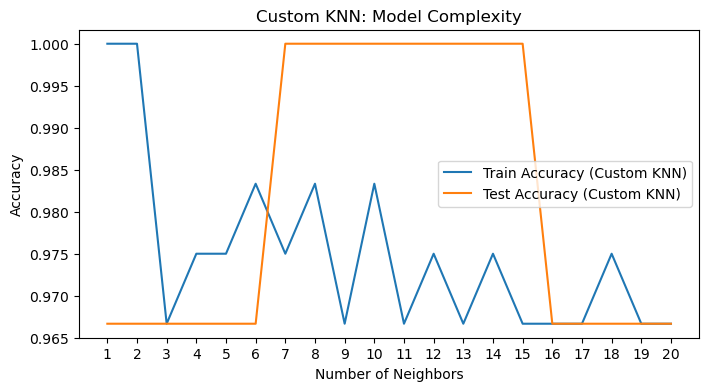

In [82]:
# Plotting
plt.figure(figsize=(8, 4))
plt.plot(neighbors_range, train_accuracies_custom_knn, label='Train Accuracy (Custom KNN)')

plt.plot(neighbors_range, test_accuracies_custom_knn, label='Test Accuracy (Custom KNN)')

plt.title('Custom KNN: Model Complexity')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.xticks(neighbors_range)
plt.legend()
plt.show()

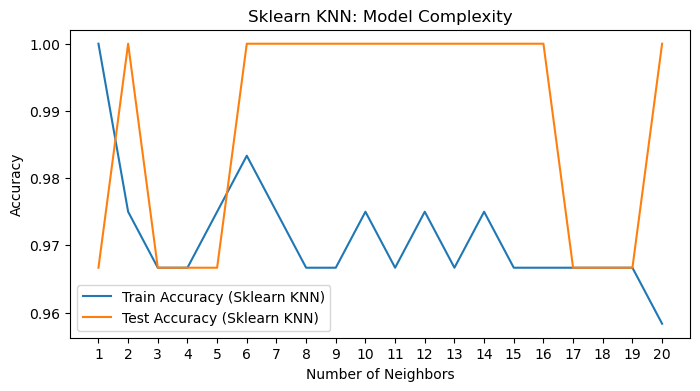

In [83]:
import matplotlib.pyplot as plt

# Define range of neighbors
neighbors_range = range(1, 21)

# Lists to store accuracies
train_accuracies_sklearn_knn = []
test_accuracies_sklearn_knn = []

# Loop through different number of neighbors
for n_neighbors in neighbors_range:
    
    # Sklearn KNN
    sklearn_knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
    
    sklearn_knn.fit(X_train, y_train)
    
    # Train accuracy
    train_accuracy_sklearn_knn = sklearn_knn.score(X_train, y_train)
    
    train_accuracies_sklearn_knn.append(train_accuracy_sklearn_knn)
    
    # Test accuracy
    test_accuracy_sklearn_knn = sklearn_knn.score(X_test, y_test)
    
    test_accuracies_sklearn_knn.append(test_accuracy_sklearn_knn)

# Plotting
plt.figure(figsize=(8, 4))

plt.plot(neighbors_range, train_accuracies_sklearn_knn, label='Train Accuracy (Sklearn KNN)')

plt.plot(neighbors_range, test_accuracies_sklearn_knn, label='Test Accuracy (Sklearn KNN)')

plt.title('Sklearn KNN: Model Complexity')

plt.xlabel('Number of Neighbors')

plt.ylabel('Accuracy')

plt.xticks(neighbors_range)

plt.legend()

plt.show()


We see that though the accuracy came out to be the same with the custom KNN as well as with SK learn KNN classifier but complexity differs. 
The custom KNN has high runtime than SKLearn Classifier.

Thank You!!